  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 2.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=fc5f3b23eb959e1ef537a34ae6395fab62bf362bf3ed2b2f825698c6bee96a39
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

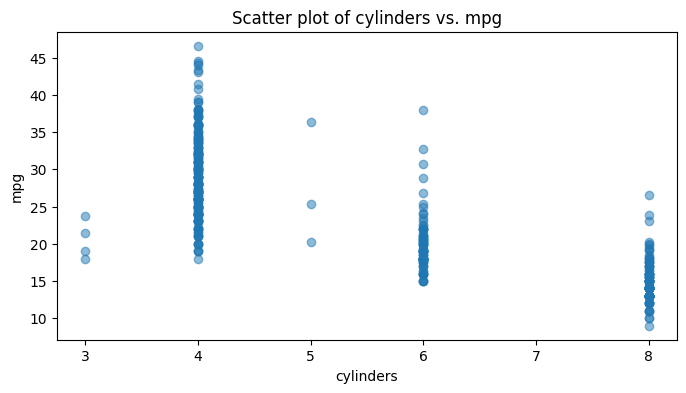

<Figure size 800x400 with 0 Axes>

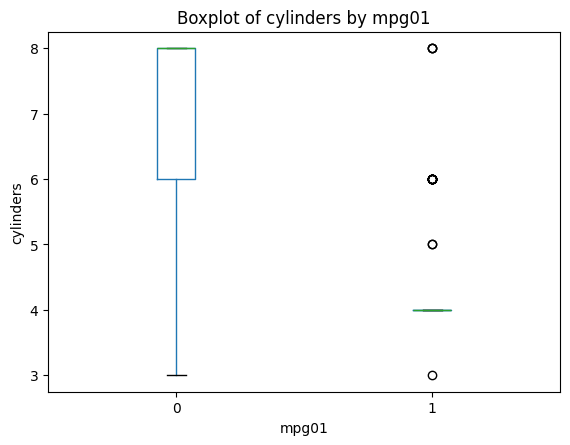

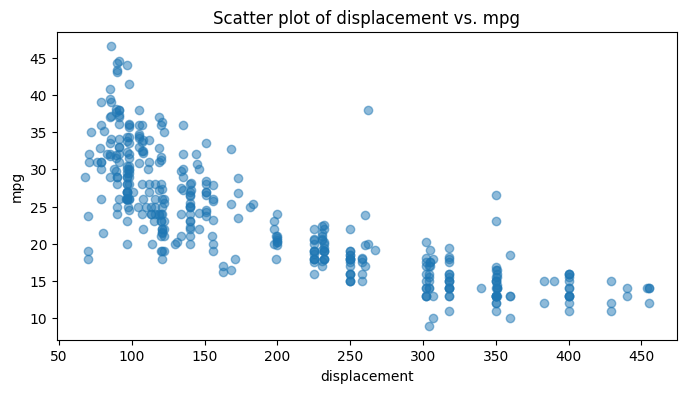

<Figure size 800x400 with 0 Axes>

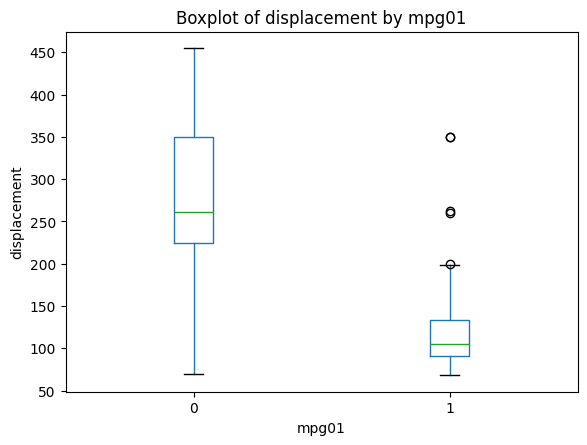

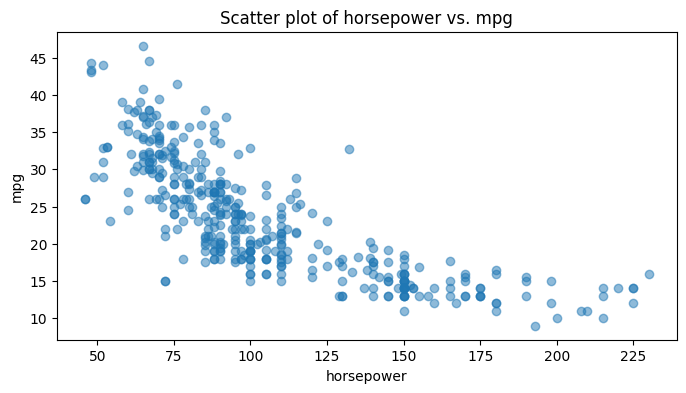

<Figure size 800x400 with 0 Axes>

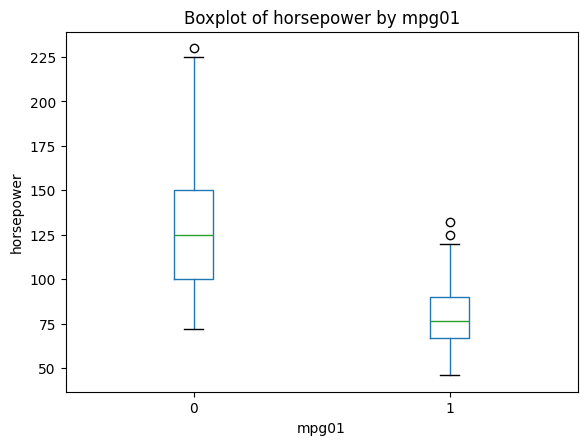

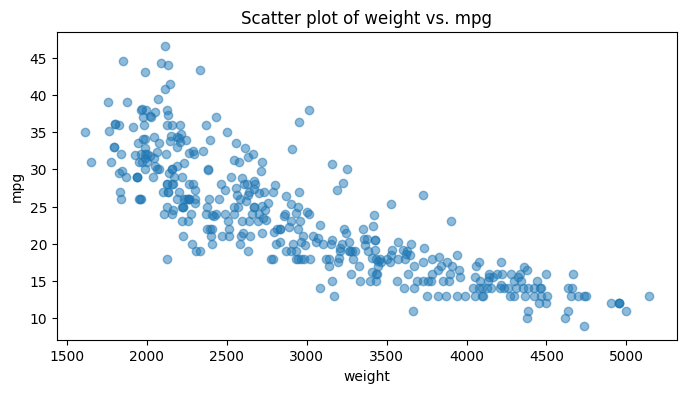

<Figure size 800x400 with 0 Axes>

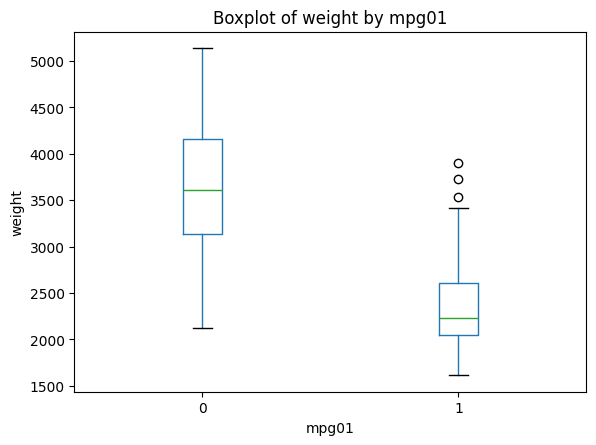

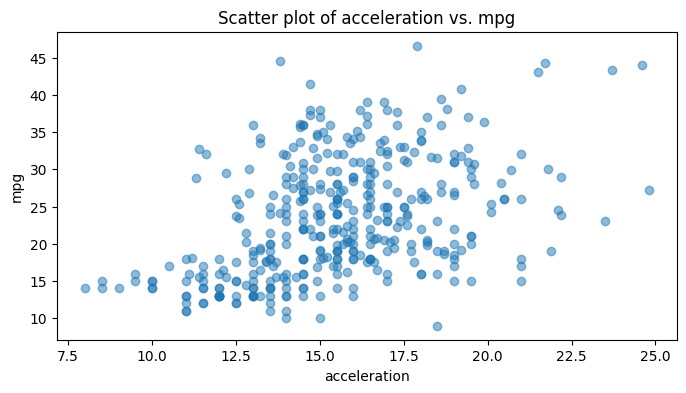

<Figure size 800x400 with 0 Axes>

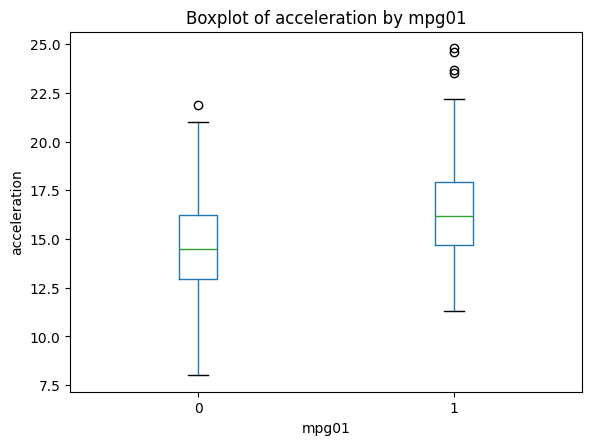

LDA Test Error: 0.1356
QDA Test Error: 0.1356
Logistic Regression Test Error: 0.1441
Naive Bayes Test Error: 0.1356
KNN Test Error with K=1: 0.1525
KNN Test Error with K=3: 0.1356
KNN Test Error with K=5: 0.1610
KNN Test Error with K=7: 0.1695
KNN Test Error with K=9: 0.1695
Best K for KNN: 3, with Test Error: 0.1356


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
###(a)mpg01

!pip install ISLP

import pandas as pd
from ISLP import load_data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Auto = load_data('Auto')

median_mpg = Auto['mpg'].median()
Auto['mpg01'] = (Auto['mpg'] > median_mpg).astype(int)

# Step (b): 圖像探索數據
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
for feature in features:
    plt.figure(figsize=(8, 4))
    plt.scatter(Auto[feature], Auto['mpg'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('mpg')
    plt.title(f'Scatter plot of {feature} vs. mpg')
    plt.show()

    plt.figure(figsize=(8, 4))
    Auto.boxplot(column=feature, by='mpg01', grid=False)
    plt.title(f'Boxplot of {feature} by mpg01')
    plt.suptitle("")
    plt.xlabel('mpg01')
    plt.ylabel(feature)
    plt.show()

# Step (c): 分割訓練集和測試集
X = Auto[features]
y = Auto['mpg01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step (d): 線性判別分析 (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
lda_error = 1 - accuracy_score(y_test, y_pred_lda)
print(f'LDA Test Error: {lda_error:.4f}')

# Step (e): 二次判別分析 (QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
qda_error = 1 - accuracy_score(y_test, y_pred_qda)
print(f'QDA Test Error: {qda_error:.4f}')

# Step (f): 邏輯迴歸
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_error = 1 - accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Test Error: {log_error:.4f}')

# Step (g): 朴素貝葉斯分類
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_error = 1 - accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Test Error: {nb_error:.4f}')

# Step (h): K-近鄰分類 (KNN)
knn_errors = {}
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    knn_error = 1 - accuracy_score(y_test, y_pred_knn)
    knn_errors[k] = knn_error
    print(f'KNN Test Error with K={k}: {knn_error:.4f}')

best_k = min(knn_errors, key=knn_errors.get)
print(f'Best K for KNN: {best_k}, with Test Error: {knn_errors[best_k]:.4f}')
